# Voice Recognition: Buka Tutup Classification

## Data Understanding 

### 1. Import Libraries
Import library dasar untuk analisis data dan audio processing.


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!



### 2. Setup Path Dataset  
Setup path dataset dan cek struktur folder datasetaudio.


In [5]:
# Definisikan path dataset
dataset_path = "datasetaudio"

# Cek struktur folder
def explore_dataset_structure(base_path):
    print("📁 Struktur Dataset:")
    for root, dirs, files in os.walk(base_path):
        level = root.replace(base_path, '').count(os.sep)
        indent = ' ' * 2 * level
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 2 * (level + 1)
        for file in files[:5]:  # Tampilkan 5 file pertama
            print(f'{subindent}{file}')
        if len(files) > 5:
            print(f'{subindent}... dan {len(files) - 5} file lainnya')

explore_dataset_structure(dataset_path)

# Hitung total file
print("\n📊 Summary Data:")
for split in ['train', 'val']:
    split_path = os.path.join(dataset_path, split)
    if os.path.exists(split_path):
        for person in os.listdir(split_path):
            person_path = os.path.join(split_path, person)
            if os.path.isdir(person_path):
                for command in ['buka', 'tutup']:
                    command_path = os.path.join(person_path, command)
                    if os.path.exists(command_path):
                        file_count = len([f for f in os.listdir(command_path) if f.endswith('.wav')])
                        print(f"{split}/{person}/{command}: {file_count} files")

📁 Struktur Dataset:
datasetaudio/
  train/
    ardi/
      buka/
        Recording_22.wav
        Recording_30.wav
        Recording_24.wav
        Recording_47.wav
        Recording_15.wav
        ... dan 45 file lainnya
      tutup/
        Recording_76.wav
        Recording_64.wav
        Recording_71.wav
        Recording_66.wav
        Recording_86.wav
        ... dan 45 file lainnya
    asep/
      buka/
        buka_train_0007.wav
        buka_train_0027.wav
        buka_train_0003.wav
        buka_train_0048.wav
        buka_train_0038.wav
        ... dan 45 file lainnya
      tutup/
        tutup_train_0044.wav
        tutup_train_0034.wav
        tutup_train_0043.wav
        tutup_train_0037.wav
        tutup_train_0018.wav
        ... dan 45 file lainnya
  val/
    ardi/
      buka/
        Recording_22.wav
        Recording_24.wav
        Recording_15.wav
        Recording_14.wav
        Recording_9.wav
        ... dan 15 file lainnya
      tutup/
        Recording_76.wav
 


### 3. Cek Distribusi Data
Analisis distribusi file audio per kelas dan split data train/validation.


📈 Distribusi Data:
   split person command  count
0  train   ardi    buka     50
1  train   ardi   tutup     50
2  train   asep    buka     50
3  train   asep   tutup     50
4    val   ardi    buka     20
5    val   ardi   tutup     20
6    val   asep    buka     20
7    val   asep   tutup     20


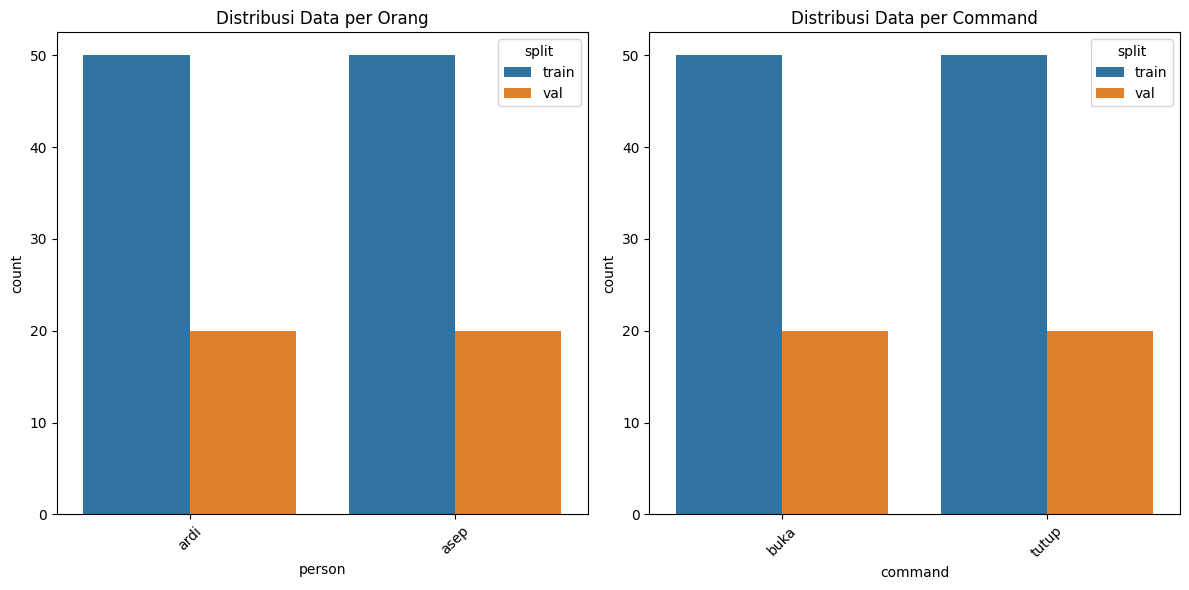

In [6]:
# Analisis distribusi data
def analyze_data_distribution(base_path):
    data_dist = []
    
    for split in ['train', 'val']:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            continue
            
        for person in os.listdir(split_path):
            person_path = os.path.join(split_path, person)
            if os.path.isdir(person_path):
                for command in ['buka', 'tutup']:
                    command_path = os.path.join(person_path, command)
                    if os.path.exists(command_path):
                        wav_files = [f for f in os.listdir(command_path) if f.endswith('.wav')]
                        data_dist.append({
                            'split': split,
                            'person': person,
                            'command': command,
                            'count': len(wav_files)
                        })
    
    df_dist = pd.DataFrame(data_dist)
    
    if not df_dist.empty:
        print("📈 Distribusi Data:")
        print(df_dist)
        
        # Visualisasi
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        sns.barplot(data=df_dist, x='person', y='count', hue='split')
        plt.title('Distribusi Data per Orang')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 2, 2)
        sns.barplot(data=df_dist, x='command', y='count', hue='split')
        plt.title('Distribusi Data per Command')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        return df_dist
    else:
        print("❌ Tidak ditemukan data audio")
        return None

df_distribution = analyze_data_distribution(dataset_path)


### 4. Contoh Audio + Metadata
Play sample audio dan visualisasi waveform + spectrogram untuk setiap kelas.


🎵 Contoh File Audio dan Metadata:

--- Contoh 1 ---
Orang: ardi
Command: buka
Split: train
File: Recording_22.wav
Sample Rate: 16000 Hz
Duration: 1.40 seconds
Shape: (22400,)

🎧 Audio Preview ardi - buka:


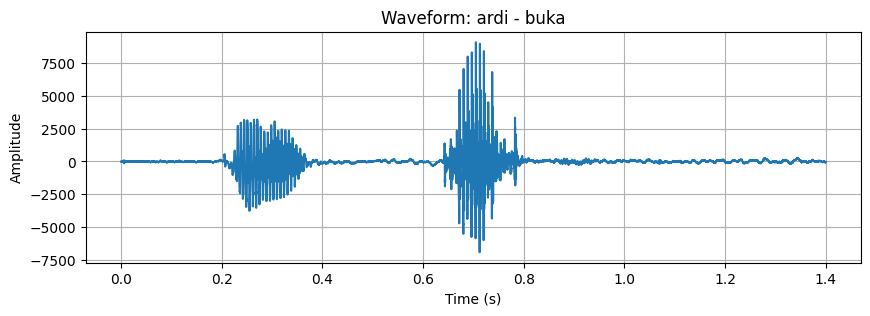


--- Contoh 2 ---
Orang: asep
Command: buka
Split: train
File: buka_train_0007.wav
Sample Rate: 16000 Hz
Duration: 1.87 seconds
Shape: (29952,)

🎧 Audio Preview asep - buka:


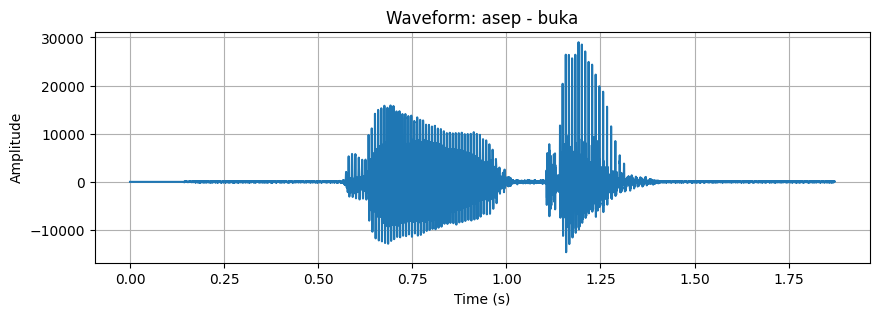

In [8]:
# Cari contoh file audio dan tampilkan metadata
def find_audio_examples(base_path):
    examples = []
    
    for split in ['train', 'val']:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            continue
            
        for person in os.listdir(split_path):
            person_path = os.path.join(split_path, person)
            if os.path.isdir(person_path):
                for command in ['buka', 'tutup']:
                    command_path = os.path.join(person_path, command)
                    if os.path.exists(command_path):
                        wav_files = [f for f in os.listdir(command_path) if f.endswith('.wav')]
                        if wav_files:
                            examples.append({
                                'split': split,
                                'person': person,
                                'command': command,
                                'file': wav_files[0],
                                'path': os.path.join(command_path, wav_files[0])
                            })
                            break
    return examples

# Tampilkan contoh audio dan metadata
audio_examples = find_audio_examples(dataset_path)

if audio_examples:
    print("🎵 Contoh File Audio dan Metadata:")
    
    for i, example in enumerate(audio_examples[:2]):  # Tampilkan 2 contoh
        print(f"\n--- Contoh {i+1} ---")
        print(f"Orang: {example['person']}")
        print(f"Command: {example['command']}")
        print(f"Split: {example['split']}")
        print(f"File: {example['file']}")
        
        # Load dan tampilkan info audio
        try:
            # Coba load dengan scipy pertama
            sample_rate, audio_data = wavfile.read(example['path'])
            duration = len(audio_data) / sample_rate
            
            print(f"Sample Rate: {sample_rate} Hz")
            print(f"Duration: {duration:.2f} seconds")
            print(f"Shape: {audio_data.shape}")
            
            # Tampilkan audio player
            print(f"\n🎧 Audio Preview {example['person']} - {example['command']}:")
            display(Audio(example['path']))
            
            # Plot waveform
            plt.figure(figsize=(10, 3))
            plt.plot(np.linspace(0, duration, len(audio_data)), audio_data)
            plt.title(f"Waveform: {example['person']} - {example['command']}")
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")
            plt.grid(True)
            plt.show()
            
        except Exception as e:
            print(f"❌ Error loading {example['path']}: {e}")
            
else:
    print("❌ Tidak ditemukan contoh audio")


### 5. Analisis Durasi dan Sample Rate
Analisis statistik durasi audio dan konsistensi sample rate dataset.


📊 Statistik Karakteristik Audio:
Total files analyzed: 80

Sample Rates: [16000]

Statistik Durasi:
count    80.000000
mean      1.741700
std       0.398549
min       1.100000
25%       1.500000
50%       1.616000
75%       2.112000
max       3.312000
Name: duration, dtype: float64


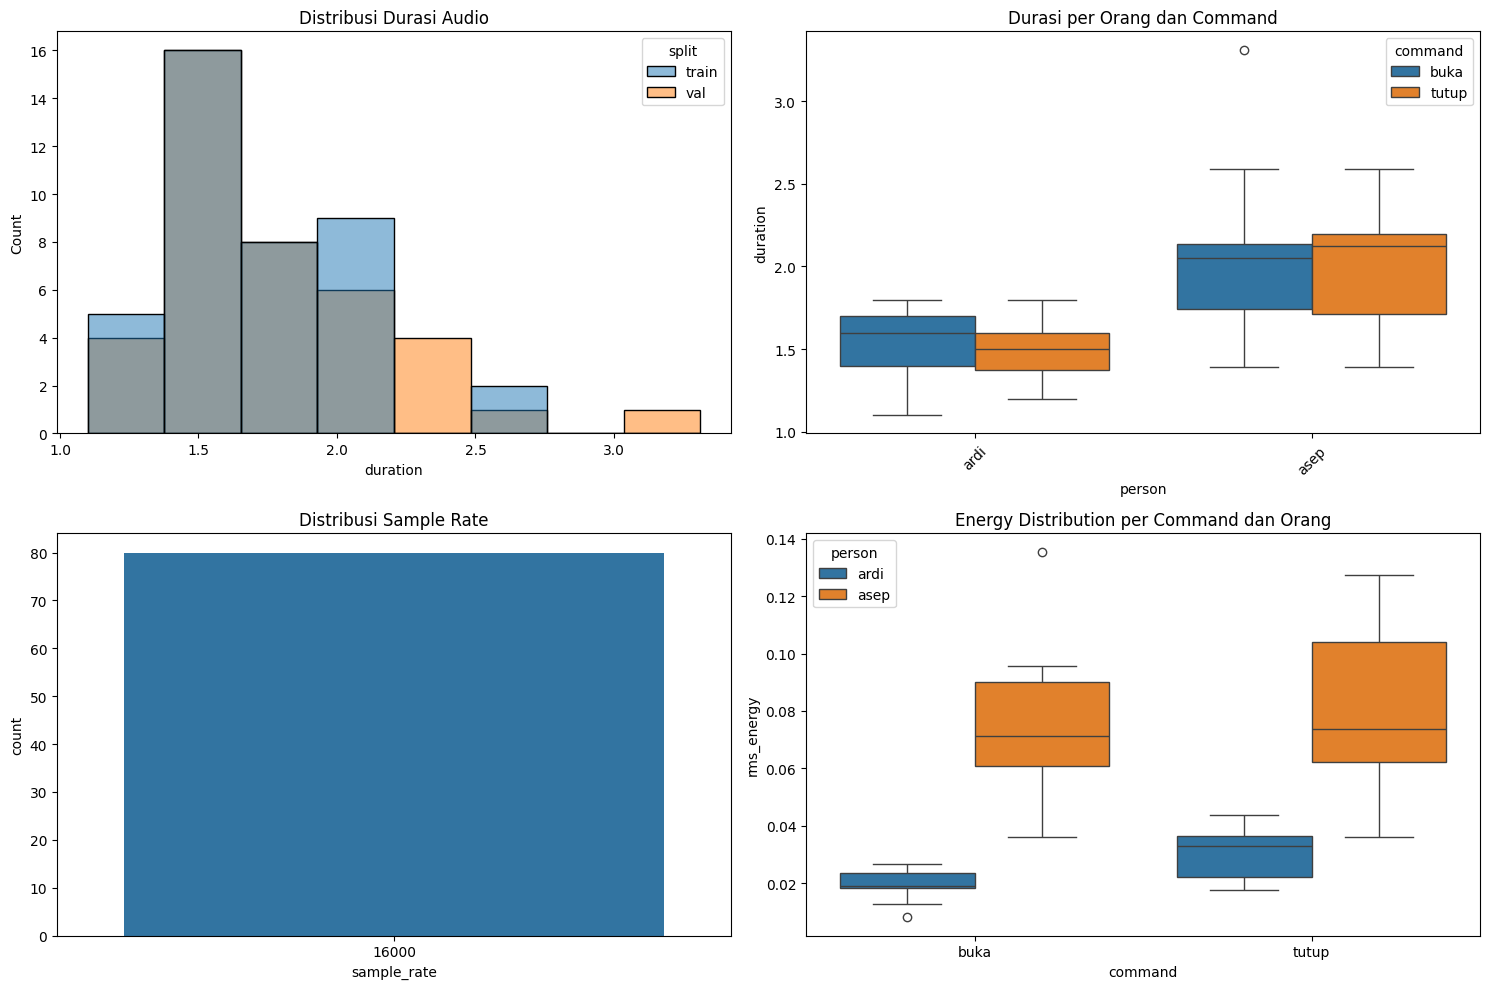

In [9]:
# Analisis komprehensif karakteristik audio
def analyze_audio_characteristics(base_path):
    audio_info = []
    
    for split in ['train', 'val']:
        split_path = os.path.join(base_path, split)
        if not os.path.exists(split_path):
            continue
            
        for person in os.listdir(split_path):
            person_path = os.path.join(split_path, person)
            if os.path.isdir(person_path):
                for command in ['buka', 'tutup']:
                    command_path = os.path.join(person_path, command)
                    if os.path.exists(command_path):
                        wav_files = [f for f in os.listdir(command_path) if f.endswith('.wav')]
                        
                        for file in wav_files[:10]:  # Analisis 10 file per kategori untuk efisiensi
                            file_path = os.path.join(command_path, file)
                            
                            try:
                                # Gunakan librosa untuk kompatibilitas lebih baik
                                audio, sr = librosa.load(file_path, sr=None)
                                duration = len(audio) / sr
                                
                                audio_info.append({
                                    'split': split,
                                    'person': person,
                                    'command': command,
                                    'file': file,
                                    'sample_rate': sr,
                                    'duration': duration,
                                    'num_samples': len(audio),
                                    'rms_energy': np.sqrt(np.mean(audio**2))
                                })
                                
                            except Exception as e:
                                print(f"Error processing {file_path}: {e}")
    
    if audio_info:
        df_audio = pd.DataFrame(audio_info)
        
        print("📊 Statistik Karakteristik Audio:")
        print(f"Total files analyzed: {len(df_audio)}")
        print(f"\nSample Rates: {df_audio['sample_rate'].unique()}")
        print(f"\nStatistik Durasi:")
        print(df_audio['duration'].describe())
        
        # Visualisasi
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Distribusi durasi
        sns.histplot(data=df_audio, x='duration', hue='split', ax=axes[0,0])
        axes[0,0].set_title('Distribusi Durasi Audio')
        
        # Durasi per orang dan command
        sns.boxplot(data=df_audio, x='person', y='duration', hue='command', ax=axes[0,1])
        axes[0,1].set_title('Durasi per Orang dan Command')
        axes[0,1].tick_params(axis='x', rotation=45)
        
        # Sample rate distribution
        sns.countplot(data=df_audio, x='sample_rate', ax=axes[1,0])
        axes[1,0].set_title('Distribusi Sample Rate')
        
        # RMS Energy
        sns.boxplot(data=df_audio, x='command', y='rms_energy', hue='person', ax=axes[1,1])
        axes[1,1].set_title('Energy Distribution per Command dan Orang')
        
        plt.tight_layout()
        plt.show()
        
        return df_audio
    else:
        print("❌ Tidak ada data audio yang bisa dianalisis")
        return None

# Jalankan analisis
df_audio_analysis = analyze_audio_characteristics(dataset_path)